# Cell distinction by adding a feature (koordinates) to existing KMeans code using HeLa images
By adding this feature it is possible to differentiate between different cells 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os # To save images
from matplotlib import colors # To convert image models
import cv2 as cv2 # To apply filters

In [2]:

from Functions.CellDistinction import preprocess_gray_with_coords
from Functions.FinalKMeans import init_centroids
from Functions.FinalKMeans import assign_to_centroids
from Functions.FinalKMeans import update_centroids
from Functions.CellDistinction import reconstruct_colored_segmentation
from Functions.CellDistinction import reconstruct_colored_segmentation_mask
from Functions.FinalKMeans import save_image
from Functions.FinalKMeans import save_image_universal
from Functions.CellDistinction import kmeans_with_coords
from Functions.Datenvorbereitung import apply_median_filter 
from Functions.CellDistinction import elbow_method_with_coords
from Functions.FinalKMeans import plot_elbow_method
from Functions.FinalKMeans import find_elbow

In [3]:
#gray_t13_median = apply_median_filter(np.copy(plt.imread('Original_Images/Otsu/Data/N2DL-HeLa/img/t13.tif')), kernel=5) --> not effective
gray_t13 = np.copy(plt.imread('Original_Images/Otsu/Data/N2DL-HeLa/img/t13.tif'))
gray_t52 = np.copy(plt.imread('Original_Images/Otsu/Data/N2DL-HeLa/img/t52.tif'))
gray_t75 = np.copy(plt.imread('Original_Images/Otsu/Data/N2DL-HeLa/img/t75.tif'))
gray_t79 = np.copy(plt.imread('Original_Images/Otsu/Data/N2DL-HeLa/img/t79.tif'))

In [18]:
#centroids_gray_t13_median, labels_gray_t13_median, differentiated_gray_t13_median = kmeans_with_coords(gray_t13_median, k=39, init_method='kmeans++', intensity_weight=0.5, mask_usage=True)
centroids_gray_t13, labels_gray_t13, differentiated_gray_t13 = kmeans_with_coords(gray_t13, k=15, init_method='kmeans++', intensity_weight=1.4, mask_usage=True)
#centroids_gray_t52, labels_gray_t52, differentiated_gray_t52 = kmeans_with_coords(gray_t52, k=5, init_method='kmeans++', intensity_weight=2)
#centroids_gray_t75, labels_gray_t75, differentiated_gray_t75 = kmeans_with_coords(gray_t75, k=30, init_method='kmeans++', intensity_weight=2)
#centroids_gray_t79, labels_gray_t79, differentiated_gray_t79 = kmeans_with_coords(gray_t79, k=10, init_method='kmeans++', intensity_weight= )

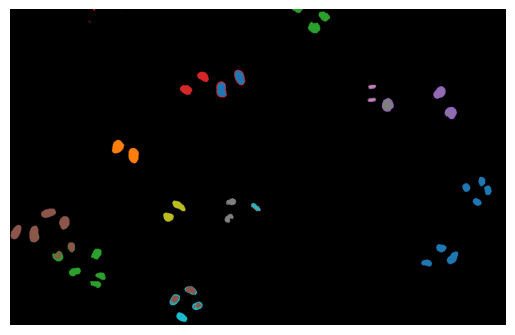

In [19]:
plt.imshow(differentiated_gray_t13)
plt.axis('off')
plt.show()

In [6]:
#save_image_universal(differentiated_gray_t13, 'Images/Segmented_Images/Differentiated_images/t13/t13.png', space='rgb')

To identify how many clusters are optimal we use the elbow method:

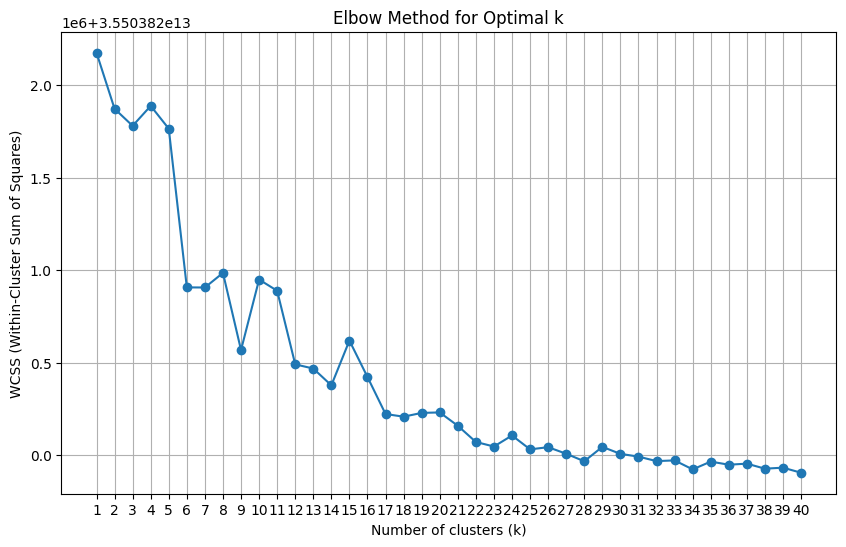

In [20]:
WCSS_gray_t13 = elbow_method_with_coords(gray_t13, max_k=40, k=15, init_method='kmeans++', intensity_weight=1.4, mask_usage=True)
plot_elbow_method(WCSS_gray_t13)

In [21]:
ideal_k = find_elbow(WCSS_gray_t13)

ideal_k

np.int64(9)

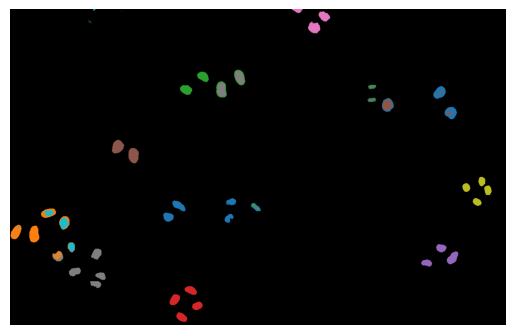

In [12]:
centroids_gray_t13, labels_gray_t13, differentiated_gray_t13 = kmeans_with_coords(gray_t13, k=15, init_method='kmeans++', intensity_weight=1.4, mask_usage=True)
plt.imshow(differentiated_gray_t13)
plt.axis('off')
plt.show()